In [ ]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [ ]:
y_pred

array([1])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

fashon_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_train_full.dtype)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) uint8


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

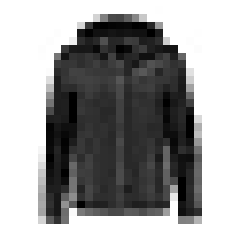

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03772997, -0.05319334, -0.0684712 , ...,  0.05835499,
        -0.03910427, -0.04460123],
       [-0.05711527, -0.01958616, -0.01586225, ...,  0.06197464,
         0.02479436, -0.02260917],
       [-0.03777295, -0.03179492,  0.01490857, ...,  0.04383795,
         0.02836841,  0.02021407],
       ...,
       [ 0.05032969, -0.03960088, -0.06531814, ..., -0.02436697,
        -0.01531855, -0.02781194],
       [-0.00873802,  0.00733584, -0.05125324, ..., -0.01713576,
         0.02908567,  0.00303198],
       [ 0.00017513,  0.03135047, -0.03680541, ..., -0.06795985,
         0.02584897,  0.03389594]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7234 - accuracy: 0.7664 - val_loss: 0.5220 - val_accuracy: 0.8218
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8314 - val_loss: 0.4550 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4402 - accuracy: 0.8461 - val_loss: 0.4138 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4136 - accuracy: 0.8567 - val_loss: 0.4021 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8617 - val_loss: 0.3806 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3808 - accuracy: 0.8655 - val_loss: 0.3654 - val_accuracy: 0.8768
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8716 - val_loss: 0.3735 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

그림 저장: keras_learning_curves_plot


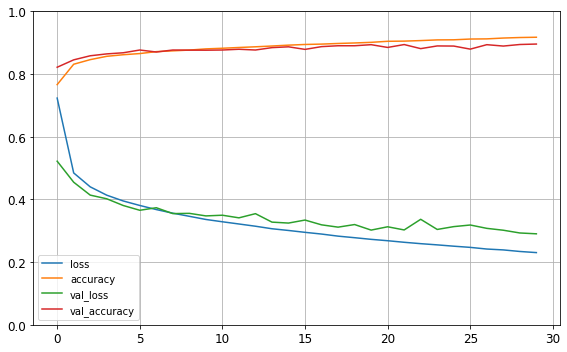

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8820


[0.33026599884033203, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
    ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7995 - val_loss: 0.7440
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5260 - val_loss: 0.5145
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4712 - val_loss: 0.4926
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4584 - val_loss: 0.4655
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4399 - val_loss: 0.4644
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4723 - val_loss: 0.4635
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4532 - val_loss: 0.4528
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4291 - val_loss: 0.4455
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4142 - val_loss: 0.4382
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4082 - val_loss: 0.4346

함수형 API를 사용해 복잡한 모델 만들기

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 3ms/step - loss: 2.4862 - val_loss: 1.0743
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9056 - val_loss: 0.7904
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7459 - val_loss: 0.7078
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6787 - val_loss: 0.6621
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6364 - val_loss: 0.6288
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6048 - val_loss: 0.6043
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5799 - val_loss: 0.5850
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5596 - val_loss: 0.5693
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5432 - val_loss: 0.5564
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5301 - val_loss: 0.5448
Epoch 11/2

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0566 - val_loss: 0.7676
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6914 - val_loss: 0.6127
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5818 - val_loss: 0.5436
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5167 - val_loss: 0.5164
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4896 - val_loss: 0.4981
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4758 - val_loss: 0.4882
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4662 - val_loss: 0.4783
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4583 - val_loss: 0.4724
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4525 - val_loss: 0.4673
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4481 - val_lo

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)